In [14]:
from statsmodels.tsa.ar_model import AR
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [15]:
# Import data
path = '/Users/thainam/Documents/GitHub/grey-model/data/data_ANN_LSTM/population_render.csv'
data = pd.read_csv(path)
data["Year"] = pd.to_datetime(data["Year"])
index_data = data.set_index(["Year"], drop=True)

# Check data
index_data.head()

,Population
Year,
2005-12-31,83.832661
2006-12-31,84.617540
2007-12-31,85.419591
2008-12-31,86.243413
2009-12-31,87.092252


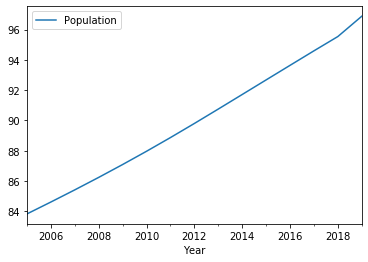

In [16]:
df = index_data[["Population"]]
df.plot()

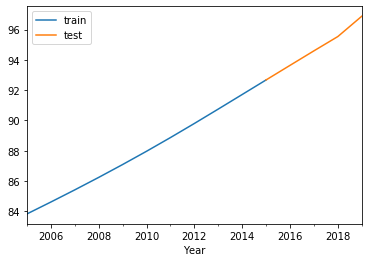

In [17]:
# Split data
split_date = pd.Timestamp('2015-12-31')

train = df.loc[:split_date]
test = df.loc[split_date:]

# Plot splitted data
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [18]:
# Autoregression
model = AR(train)
model_fit = model.fit()
predict = model_fit.predict(10, len(data) - 1)

# MAPE Score
def MAPE(y, y_pred):
    y, y_pred = np.array(y), np.array(y_pred)
    return (np.mean(np.abs((y - y_pred) / y)) * 100)

print(predict)
print("MAPE score is: " + str(MAPE(test, predict)))

2015-12-31    92.677076
2016-12-31    93.633817
2017-12-31    94.578025
2018-12-31    95.507135
2019-12-31    96.428290
Freq: A-DEC, dtype: float64
MAPE score is: 1.6830280003715756


/Users/thainam/.pyenv/versions/3.7.6/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WA

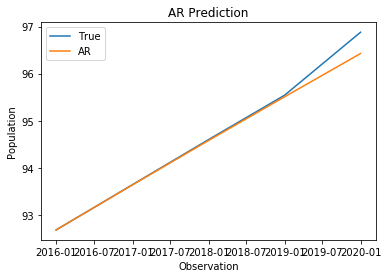

In [19]:
# Graphing
plt.plot(test, label='True')
plt.plot(predict, label='AR')
plt.title("AR Prediction")
plt.xlabel('Observation')
plt.ylabel('Population')
plt.legend()
plt.show()